#### Lilian Nguyen
#### 5/6/25
#### Final Project
****
#### Purpose: Analyzing weekly U.S. hospital capacity and admissions with data from 2020 - 2024. It will focus on ICU usage, COVID-19 and flu admissions, and data reporting consistency within hospitals.

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading dataset
file = 'Weekly_Hospitalization_Final_Project.csv'
df = pd.read_csv(file)
#Preview dataset
df.head()

,Week Ending Date,Geographic aggregation,Hospital Reporting Days,Percent Hospital Reporting Days,Number Hospitals Reporting Adult COVID-19 Admissions,Number Hospitals Reporting Pediatric COVID-19 Admissions,Number Hospitals Reporting Influenza Admissions,Number Hospitals Reporting Prevalent Influenza Hospitalizations,Number Hospitals Reporting Hospitalized Influenza ICU Patients,Number Hospitals Reporting Inpatient Beds,...,Absolute Change in the Percent Hospitals Reporting ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Total COVID-19 Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Prevalent COVID-19 Hospitalizations from Prior Week,Absolute Change in the Percent Hospitals Reporting Hospitalized COVID-19 ICU Patients from Prior Week
0,2021-01-16,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-23,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-08,AK,98.0,1.0,11,11,0,0,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-30,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-06,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Step 0: Renaming column so data is easier to work with
def clean(name):
    return(
        name.lower()
        .replace(" ","_")
        .replace("-", "_")
        .replace("%", "percent")
        .replace("/", "_")
    )

df.columns = [clean(col) for col in df.columns]

#Step 1: Chanding date column after renaming
df['week_ending_date'] = pd.to_datetime(df['week_ending_date'], errors = 'coerce')

#Step 2: Identify the rows and remove rows that are 0s
keymetrics = [
    'weekly_average_adult_covid_19_admissions',
    'weekly_average_influenza_admissions',
    'weekly_average_percent_icu_bed_occupancy',
    'weekly_average_icu_beds_occupied',
    'weekly_total_influenza_admissions'
]

#Checks for 0s
allzero = (df[keymetrics] == 0).all(axis=1)

dfcleaned= df[~allzero].copy()

#Step 3: Remove missing values by assigning median
columnsa = [
    'weekly_average_influenza_admissions',
    'weekly_average_percent_icu_bed_occupancy',
    'weekly_average_icu_beds_occupied',
    'weekly_average_hospitalized_covid_19_icu_patients',
    'weekly_average_percent_influenza_inpatient_bed_occupancy'
]
for col in columnsa:
    if col in dfcleaned.columns:
        medianval = dfcleaned[col].median()
        dfcleaned[col] = dfcleaned[col].fillna(medianval)


dfcleaned.to_csv("Weekly_Hospitalization_cleaned.csv", index=False)

#Checking cleaned data
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12597 entries, 0 to 12596
Data columns (total 82 columns):
 #   Column                                                                                                         Non-Null Count  Dtype         
---  ------                                                                                                         --------------  -----         
 0   week_ending_date                                                                                               12597 non-null  datetime64[ns]
 1   geographic_aggregation                                                                                         12597 non-null  object        
 2   hospital_reporting_days                                                                                        12426 non-null  float64       
 3   percent_hospital_reporting_days                                                                                12426 non-null  float64       
 4   numb

,week_ending_date,geographic_aggregation,hospital_reporting_days,percent_hospital_reporting_days,number_hospitals_reporting_adult_covid_19_admissions,number_hospitals_reporting_pediatric_covid_19_admissions,number_hospitals_reporting_influenza_admissions,number_hospitals_reporting_prevalent_influenza_hospitalizations,number_hospitals_reporting_hospitalized_influenza_icu_patients,number_hospitals_reporting_inpatient_beds,...,absolute_change_in_the_percent_hospitals_reporting_icu_beds_occupied_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_covid_19_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_influenza_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_covid_19_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_influenza_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_total_covid_19_admissions_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_prevalent_covid_19_hospitalizations_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_hospitalized_covid_19_icu_patients_from_prior_week_
0,2021-01-16,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-01-23,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-08-08,AK,98.0,1.0,11,11,0,0,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-01-30,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-06,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Question 1: Did bed occupancy (a percentage) change over time across different states? By how much?
#### To answer this question, I will be plotting the average inpatient bed occupancy percentage for different states. This can help visualize the trend of occupancy due to COVID-19 and Influenza


In [14]:
#Renaming for easier use
df.rename(columns={
    "weekly_average_percent_inpatient_bed_occupancy": "avgbedocc",
    "geographic_aggregation": "state"
}, inplace =True)

In [66]:
#Finding mean bed occupancy
occtime = df.groupby(["week_ending_date","state"])["avgbedocc"].mean().reset_index()

#Preview 
occtime.head()

,week_ending_date,state,avgbedocc
0,2020-08-08,AK,0.41
1,2020-08-08,AL,0.71
2,2020-08-08,AR,0.65
3,2020-08-08,AZ,0.82
4,2020-08-08,CA,0.71


In [18]:
#Choosing states to visualize
selected=["NY","TX","CA","FL","IL"]
ss= occtime[occtime["state"].isin(selected)]

#Preview
ss.head()

,week_ending_date,state,avgbedocc
5,2020-08-08,CA,0.71
10,2020-08-08,FL,0.60
16,2020-08-08,IL,0.62
37,2020-08-08,NY,0.68
47,2020-08-08,TX,0.72


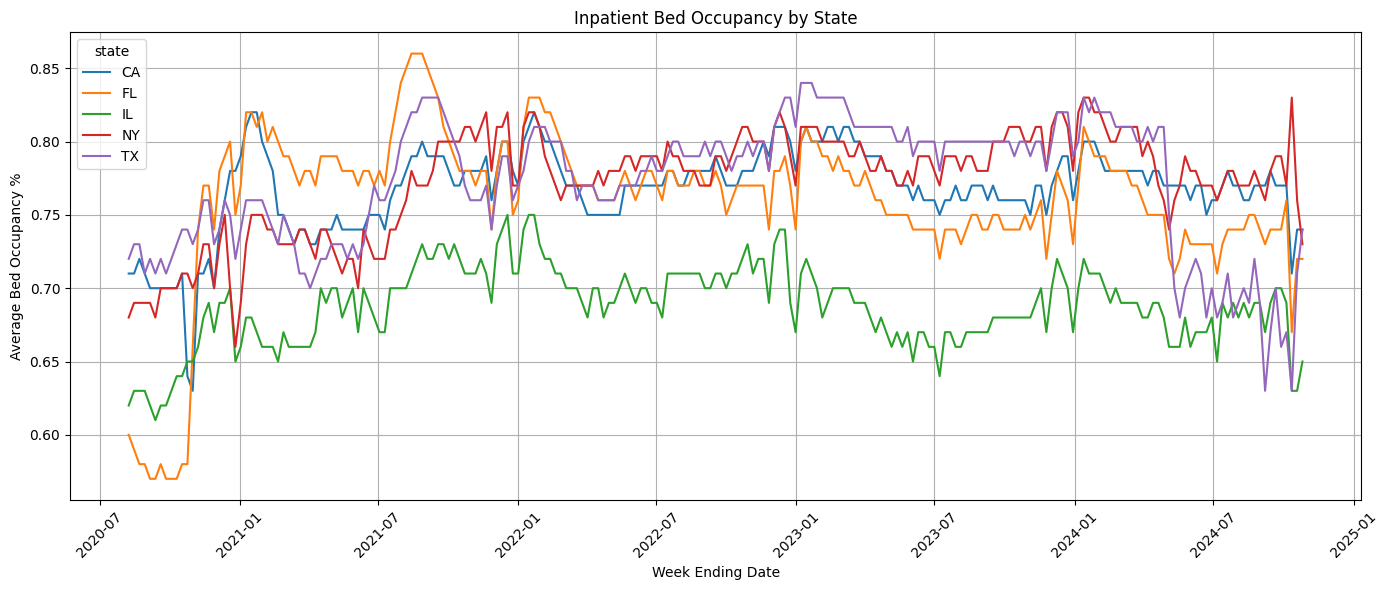

In [18]:
#Plotting Q1
plt.figure(figsize=(14, 6))
sns.lineplot(data=ss, x="week_ending_date", y="avgbedocc", hue="state")
plt.title("Inpatient Bed Occupancy by State")
plt.ylabel("Average Bed Occupancy %")
plt.xlabel("Week Ending Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid
plt.show()

### Question 2: Is there any correlation between the number of hospitals reporting and percent of hospital reporting days? Visualize with plot.
#### This question is to find if there is a relationship between the number of hospitals reporting each week and the percentage of reporting days captured. A scatterplot will be used to visualize to see if there is a connection
##### Ref:
##### https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

In [20]:
#Renaming columns for easier use
df.rename(columns={
    "hospital_reporting_days": "rdays",
    "percent_hospital_reporting_days": "percentr"
}, inplace=True)

In [22]:
#Dropping missing data if there is
dfm = df[["rdays","percentr"]].dropna()

#Preview
dfm.head()

,rdays,percentr
0,0.0,0.0
1,0.0,0.0
2,98.0,1.0
3,0.0,0.0
4,0.0,0.0


In [30]:
#Finding correlation
c = dfm.corr().iloc[0,1]
print(f"Correlation:{c:.3f}")

Correlation:0.057


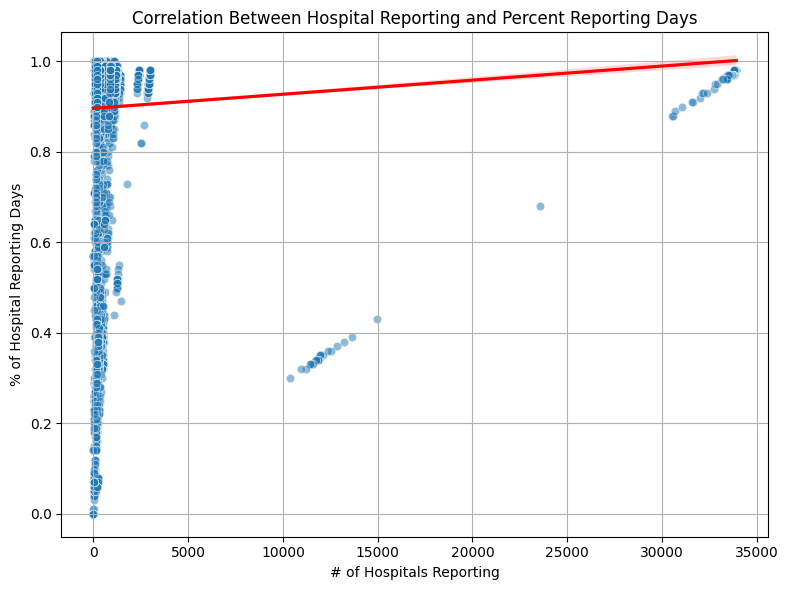

In [32]:
#Plotting Q2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=dfm, x="rdays", y="percentr", alpha=0.5)
sns.regplot(data=dfm, x="rdays", y="percentr", scatter=False, color= "red")
plt.title("Correlation Between Hospital Reporting and Percent Reporting Days")
plt.xlabel("# of Hospitals Reporting")
plt.ylabel("% of Hospital Reporting Days")
plt.tight_layout()
plt.grid(True)
plt.show()


### Question 3: How do ICU bed occupancy rates compare between different states with high vs. low COVID-19 patient admissions?
#### This question classifies states into "High" or "Low" COVID-19 admissions levels based on median weekly adult COVID-19 admission rates. It is to compare the ICU bed occupancy between the two groups.

In [38]:
#Calculate average weekly COVID admissions per state
statecavg=df.groupby("state")["weekly_average_adult_covid_19_admissions"].mean().reset_index()

#Preview
statecavg.head()

,state,weekly_average_adult_covid_19_admissions
0,AK,5.171584
1,AL,80.254887
2,AR,44.895385
3,AS,0.197534
4,AZ,100.936652


In [46]:
#Sort states based on median
medadm = statecavg["weekly_average_adult_covid_19_admissions"].median()
statecavg["covid_level"] = statecavg["weekly_average_adult_covid_19_admissions"].apply(
    lambda x: "High" if x > medadm else "Low"
)

#Preview
print("Median of weekly avg adm:", medadm)
statecavg.head()

Median of weekly avg adm 47.428868778280545


,state,weekly_average_adult_covid_19_admissions,covid_level
0,AK,5.171584,Low
1,AL,80.254887,High
2,AR,44.895385,Low
3,AS,0.197534,Low
4,AZ,100.936652,High


In [48]:
#Combine with main dataset
dfwlev = df.merge(statecavg[["state", "covid_level"]], on="state")

#Preview
dfwlev.head()

,week_ending_date,state,rdays,percentr,number_hospitals_reporting_adult_covid_19_admissions,number_hospitals_reporting_pediatric_covid_19_admissions,number_hospitals_reporting_influenza_admissions,number_hospitals_reporting_prevalent_influenza_hospitalizations,number_hospitals_reporting_hospitalized_influenza_icu_patients,number_hospitals_reporting_inpatient_beds,...,absolute_change_in_the_percent_hospitals_reporting_percent_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_covid_19_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_influenza_inpatient_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_covid_19_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_percent_influenza_icu_bed_occupancy_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_total_covid_19_admissions_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_prevalent_covid_19_hospitalizations_from_prior_week_,absolute_change_in_the_percent_hospitals_reporting_hospitalized_covid_19_icu_patients_from_prior_week_,covid_level
0,2021-01-16,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,2021-01-23,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
2,2020-08-08,AK,98.0,1.0,11,11,0,0,0,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,2021-01-30,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
4,2021-02-06,AS,0.0,0.0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [98]:
#To help understand the boxplot better
# View High admission states
highstates = statecavg[statecavg["covid_level"] == "High"]
print("High admission states:\n", highstates["state"].tolist())

# View Low admission states
lowstates = statecavg[statecavg["covid_level"] == "Low"]
print("Low admission states:\n", lowstates["state"].tolist())

High admission states:
 ['AL', 'AZ', 'CA', 'CO', 'FL', 'GA', 'IL', 'IN', 'KY', 'LA', 'MA', 'MD', 'MI', 'MN', 'MO', 'NC', 'NJ', 'NY', 'OH', 'OK', 'PA', 'SC', 'TN', 'TX', 'USA', 'VA', 'WA', 'WI']
Low admission states:
 ['AK', 'AR', 'AS', 'CT', 'DC', 'DE', 'GU', 'HI', 'IA', 'ID', 'KS', 'ME', 'MP', 'MS', 'MT', 'ND', 'NE', 'NH', 'NM', 'NV', 'OR', 'PR', 'RI', 'SD', 'UT', 'VI', 'VT', 'WV', 'WY']


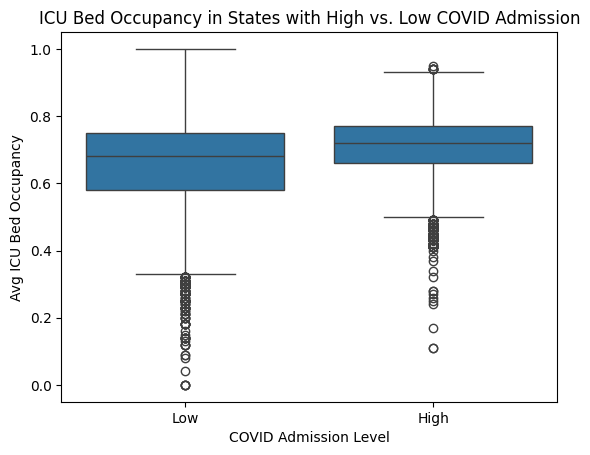

In [50]:
#Plotting Q3
sns.boxplot(data=dfwlev, x="covid_level", y="weekly_average_percent_icu_bed_occupancy")
plt.title("ICU Bed Occupancy in States with High vs. Low COVID Admission")
plt.xlabel("COVID Admission Level")
plt.ylabel("Avg ICU Bed Occupancy")
plt.show()

### Question 4: What is pediatric vs. adult COVID-19 admissions trend across different regions?
#### Compares between adult and children COVID-19 hospital admissions over time. We group the data by regions to show the different trends between adults and children.

In [58]:
#Creating regions for the dataset
stor={
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',

    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',

    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South', 'VA': 'South', 'DC': 'South',
    'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South', 'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South',

    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West'
}
#Create a column for region
df["region"] = df["state"].map(stor)
df = df.dropna(subset=["region"])
df[["state","region"]].drop_duplicates().head()

,state,region
2,AK,West
253,AL,South
474,AR,South
884,AZ,West
1105,CA,West


In [60]:
#Group by week, region, and average admissions
pva = df.groupby(["week_ending_date", "region"])[
["weekly_average_adult_covid_19_admissions","weekly_average_pediatric_covid_19_admissions"]].mean().reset_index()

#Preview
pva.head()

,week_ending_date,region,weekly_average_adult_covid_19_admissions,weekly_average_pediatric_covid_19_admissions
0,2020-08-08,Midwest,39.286667,0.831667
1,2020-08-08,Northeast,23.842222,0.523333
2,2020-08-08,South,157.395882,2.974706
3,2020-08-08,West,75.636923,1.703077
4,2020-08-15,Midwest,45.131667,1.189167


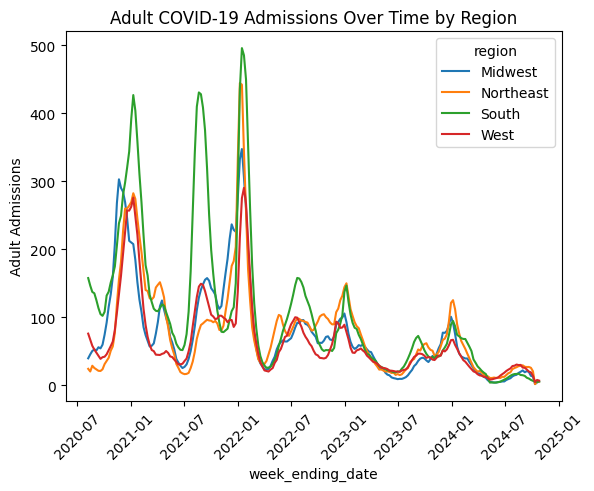

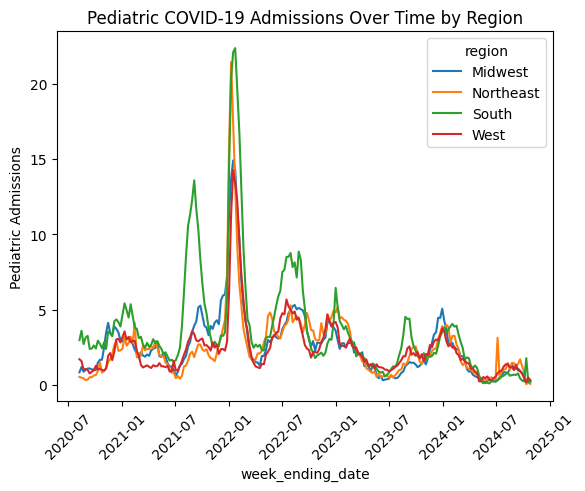

In [62]:
#Plotting for Q4
#Plot for adults
sns.lineplot(data=pva, x="week_ending_date", y="weekly_average_adult_covid_19_admissions", hue="region")
plt.title("Adult COVID-19 Admissions Over Time by Region")
plt.xticks(rotation=45)
plt.ylabel("Adult Admissions")
plt.show()

#Plot for pediatrics
sns.lineplot(data=pva, x="week_ending_date", y="weekly_average_pediatric_covid_19_admissions", hue="region")
plt.title("Pediatric COVID-19 Admissions Over Time by Region")
plt.xticks(rotation=45)
plt.ylabel("Pediatric Admissions")
plt.show()

### Question 5: Which states had the highest difference between available beds and occupied beds over time?
#### This finds the gap between the total available inpatient beds and occupied beds to understand hospital capacity. This question can help visualize which areas had the most unused resources comparable to the demand.

In [80]:
#Copy needed to avoid getting different results
df = dfcleaned.copy()
df.rename(columns={
    "geographic_aggregation": "state"
},inplace=True)

#Calculate difference between occupied and taken beds
df["bed_gap"] = df["weekly_average_inpatient_beds"] - df["weekly_average_inpatient_beds_occupied"]

#Group by state and week
statebg = df.groupby(["state","week_ending_date"])["bed_gap"].mean().reset_index()

#Preview
statebg.head()

,state,week_ending_date,bed_gap
0,AK,2020-08-08,524.85
1,AK,2020-08-15,495.00
2,AK,2020-08-22,475.14
3,AK,2020-08-29,493.00
4,AK,2020-09-05,461.57


In [84]:
#Average gap per state
avggap = statebg.groupby("state")["bed_gap"].mean().reset_index()

#Top 5 states with biggest gap
topstates = avggap.sort_values("bed_gap", ascending=False).head(5)

#Preview
print(topstates)

   state        bed_gap
48   USA  159673.790407
5     CA   13053.642715
10    FL   11851.479457
47    TX   10713.975747
37    NY    9111.231946


In [88]:
#Filter to states
topgstates=statebg[statebg["state"].isin(topstates["state"])]

#Preview
topgstates.head()

,state,week_ending_date,bed_gap
1104,CA,2020-08-08,15841.14
1105,CA,2020-08-15,15785.00
1106,CA,2020-08-22,15910.28
1107,CA,2020-08-29,16352.00
1108,CA,2020-09-05,17182.71


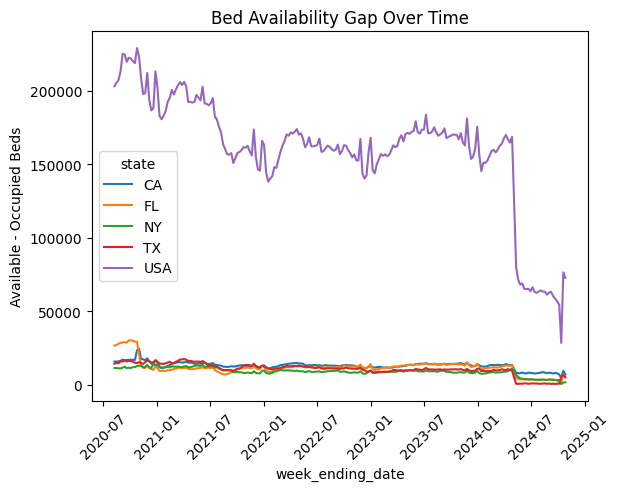

In [90]:
#Plotting for Q5
sns.lineplot(data=topgstates, x="week_ending_date", y="bed_gap", hue="state")
plt.title("Bed Availability Gap Over Time")
plt.ylabel("Available - Occupied Beds")
plt.xticks(rotation=45)
plt.show()

## Conclusion:
##### Question 1: Bed Occupancy - The line plot showed that the inpatient bed occupancy rates were different across states. States like NY and FL have significant peaks during the height of COVID-19, while other states has more stable lines. This shows that hospital use was not the same across the U.S. but depended on regional cases. Though in more recent times, the bed occupancy rates have decreased since the peak of the pandemic. This has heavily reduced the burdens in hospitals.

##### Question 2: Hospital Reporting vs. Percent Reporting Days - The scatterplot and correlation showed a weak correlation, with it being r = 0.057 between what I was comparing. This shows that the number of hospitals reporting each week has little or no impact on the consistency of reporting days. So this means that even when hospitals were reporting more, reporting days did not depend on it. Therefore, hospital size, capacity, or reporting rules played a more important role in consistent data.

##### Question 3: States with high COVID-19 admissions, like NY and Texas, had higher average ICU occupancy. While states with lower COVID-19 cases maintained an ICU capacity. This shows the direct impact of COVID-19 caseloads on hospitals, which brings attention to the need for resource allocation during the surges

##### Question 4: Adult COVID-19 admissions remained higher than pediatric admissions across all regions. Although both groups did follow similar trends like rising and falling together, which suggests common transmission patterns. Pediatric admissions did show an increase during different variants, it is a reminder that it is important to monitor hospital impacts for each age group.

##### BED AVAILABILITY GAP: The difference between the number of available hospital beds and occupied beds (Large gap: many empty beds, small gap: near or full capacity
##### Question 5: The USA line shows a large bed availability gap, often over 150,000 beds, showing a strong national capacity. In individual states like CA, TX, NY, and FL, there were smaller gaps, with narrow margins and a regular demand. A national drop in mid-2024 can suggest a change in hospital capacity or reporting. This can help create an understanding that national data can mask state-level data, making it look better.


## Cleaning Data
****
## Steps:
1.  Column names are cleaned and week ending date is converted to datetime
    - Converted the week ending date to datetime format
    - renamed all columns so it is easier to work with
    - replaced special characters
2. Remove rows that have no reported data
    - Identified key reporting metrics
    - Removed rows where values were zero
3.  Analyzing missing values, how many values
    - Assigned missing values in the columns missing values using the median
    - This helps with keeping the trend without having outliers skew the data
****
## Summary
- Rows with no data were removed
- Missing values were removed
- Dataset can now be handled and visualized easily

#### Dataset Summary

***
##### -Rows: 12,597
##### -Columns: 82
##### -Time Range: 2020-2024 (Weekly)
##### -Data taken: States and territories in the U.S.
***
#### Key Categories
***
##### -COVID-10 & Flu hospital admissions
##### -Bed and ICU occupancy
##### -Reporting Completeness
##### -State averages

In [ ]:
df.head()

In [5]:
df.tail()

,Week Ending Date,Geographic aggregation,Hospital Reporting Days,Percent Hospital Reporting Days,Number Hospitals Reporting Adult COVID-19 Admissions,Number Hospitals Reporting Pediatric COVID-19 Admissions,Number Hospitals Reporting Influenza Admissions,Number Hospitals Reporting Prevalent Influenza Hospitalizations,Number Hospitals Reporting Hospitalized Influenza ICU Patients,Number Hospitals Reporting Inpatient Beds,...,Absolute Change in the Percent Hospitals Reporting ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Total COVID-19 Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Prevalent COVID-19 Hospitalizations from Prior Week,Absolute Change in the Percent Hospitals Reporting Hospitalized COVID-19 ICU Patients from Prior Week
12592,2024-09-28,WY,131.0,0.72,21,21,21,21,21,21,...,3.85,3.85,3.85,3.85,3.85,3.85,3.85,3.85,3.85,3.85
12593,2024-10-05,WY,125.0,0.69,20,20,20,20,20,20,...,-3.85,-3.85,-3.85,-3.85,-3.85,-3.85,-3.85,-3.85,-3.85,-3.85
12594,2024-10-12,WY,NaN,NaN,4,4,4,4,4,4,...,-61.54,-61.54,-61.54,-61.54,-61.54,-61.54,-61.54,-61.54,-61.54,-61.54
12595,2024-10-19,WY,NaN,NaN,7,7,7,7,7,7,...,11.54,11.54,11.54,11.54,11.54,11.54,11.54,11.54,11.54,11.54
12596,2024-10-26,WY,NaN,NaN,9,9,9,9,9,9,...,7.69,7.69,7.69,7.69,7.69,7.69,7.69,7.69,7.69,7.69


In [6]:
df.sample(5)

,Week Ending Date,Geographic aggregation,Hospital Reporting Days,Percent Hospital Reporting Days,Number Hospitals Reporting Adult COVID-19 Admissions,Number Hospitals Reporting Pediatric COVID-19 Admissions,Number Hospitals Reporting Influenza Admissions,Number Hospitals Reporting Prevalent Influenza Hospitalizations,Number Hospitals Reporting Hospitalized Influenza ICU Patients,Number Hospitals Reporting Inpatient Beds,...,Absolute Change in the Percent Hospitals Reporting ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Total COVID-19 Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Prevalent COVID-19 Hospitalizations from Prior Week,Absolute Change in the Percent Hospitals Reporting Hospitalized COVID-19 ICU Patients from Prior Week
4099,2022-11-12,KS,905.0,0.99,130,130,130,130,130,130,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
361,2022-09-03,AL,665.0,1.00,95,95,95,95,95,95,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7972,2020-11-21,NV,280.0,0.93,40,40,40,40,40,40,...,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2525,2022-05-21,GA,962.0,0.97,139,139,139,139,139,136,...,0.00,0.7,0.00,0.7,0.7,0.0,0.0,0.0,0.0,0.0
392,2023-04-08,AL,665.0,1.00,95,95,95,95,95,95,...,-1.05,0.0,-1.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(12597, 82)

In [8]:
df.columns.tolist()

['Week Ending Date',
 'Geographic aggregation',
 'Hospital Reporting Days',
 'Percent Hospital Reporting Days',
 'Number Hospitals Reporting Adult COVID-19 Admissions',
 'Number Hospitals Reporting Pediatric COVID-19 Admissions',
 'Number Hospitals Reporting Influenza Admissions',
 'Number Hospitals Reporting Prevalent Influenza Hospitalizations',
 'Number Hospitals Reporting Hospitalized Influenza ICU Patients',
 'Number Hospitals Reporting Inpatient Beds',
 'Number Hospitals Reporting ICU Beds',
 'Number Hospitals Reporting Inpatient Beds Occupied',
 'Number Hospitals Reporting ICU Beds Occupied',
 'Number Hospitals Reporting Percent Inpatient Bed Occupancy',
 'Number Hospitals Reporting Percent ICU Bed Occupancy',
 'Number Hospitals Reporting Percent COVID-19 Inpatient Bed Occupancy',
 'Number Hospitals Reporting Percent Influenza Inpatient Bed Occupancy',
 'Number Hospitals Reporting Percent COVID-19 ICU Bed Occupancy',
 'Number Hospitals Reporting Percent Influenza ICU Bed Occupan

In [9]:
df.dtypes


Week Ending Date                                                                                            object
Geographic aggregation                                                                                      object
Hospital Reporting Days                                                                                    float64
Percent Hospital Reporting Days                                                                            float64
Number Hospitals Reporting Adult COVID-19 Admissions                                                         int64
                                                                                                            ...   
Absolute Change in the Percent Hospitals Reporting Percent COVID-19 ICU Bed Occupancy from Prior Week      float64
Absolute Change in the Percent Hospitals Reporting Percent Influenza ICU Bed Occupancy from Prior Week     float64
Absolute Change in the Percent Hospitals Reporting Total COVID-19 Admissions fro

In [10]:
df.describe(include='all')

,Week Ending Date,Geographic aggregation,Hospital Reporting Days,Percent Hospital Reporting Days,Number Hospitals Reporting Adult COVID-19 Admissions,Number Hospitals Reporting Pediatric COVID-19 Admissions,Number Hospitals Reporting Influenza Admissions,Number Hospitals Reporting Prevalent Influenza Hospitalizations,Number Hospitals Reporting Hospitalized Influenza ICU Patients,Number Hospitals Reporting Inpatient Beds,...,Absolute Change in the Percent Hospitals Reporting ICU Beds Occupied from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza Inpatient Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent COVID-19 ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Percent Influenza ICU Bed Occupancy from Prior Week,Absolute Change in the Percent Hospitals Reporting Total COVID-19 Admissions from Prior Week,Absolute Change in the Percent Hospitals Reporting Prevalent COVID-19 Hospitalizations from Prior Week,Absolute Change in the Percent Hospitals Reporting Hospitalized COVID-19 ICU Patients from Prior Week
count,12597,12597,12426.000000,12426.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,12597.000000,...,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000,12540.000000
unique,221,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-01-16,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,57,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1101.515371,0.899598,157.411765,156.426768,144.888624,144.920854,144.884020,156.673176,...,-0.162687,-0.232639,-0.162687,-0.197281,0.148751,-0.195024,0.141970,-0.209124,-0.226102,-0.200990
std,NaN,NaN,4172.022497,0.227113,597.283428,594.119834,565.897908,566.023270,565.890966,594.893147,...,6.033831,5.573252,6.032983,5.664480,8.089712,5.722048,8.131584,5.578961,5.596296,5.720436
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,NaN,NaN,204.250000,0.950000,28.000000,27.000000,24.000000,24.000000,24.000000,28.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,474.000000,0.980000,64.000000,63.000000,58.000000,58.000000,58.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,797.000000,1.000000,114.000000,114.000000,112.000000,112.000000,112.000000,114.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12597 entries, 0 to 12596
Data columns (total 82 columns):
 #   Column                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                         --------------  -----  
 0   Week Ending Date                                                                                               12597 non-null  object 
 1   Geographic aggregation                                                                                         12597 non-null  object 
 2   Hospital Reporting Days                                                                                        12426 non-null  float64
 3   Percent Hospital Reporting Days                                                                                12426 non-null  float64
 4   Number Hospitals Reporting Adult COVID-19 Admi

## Key Findings About Dataset
****
##### Hospital admissions followed a trend and it aligned with Covid-19 surges
##### Bed and ICU occupancy rates spiked in 2020 and 2021 showing the pressure placed on hospitals
##### Some states reported more consistently than other states. Reporting completeness is very important so people can interpret the data
##### Also along with Covid-19, Influenza admissions were also seen and matched up with seasonal trends
****
###### More analysis could be modeling the data and being able to connect it to future surges, or connecting it with vaccine data